In [1]:
! pip install openfisca-france
!pip install matplotlib
!pip install mpld3

In [2]:
%matplotlib inline

In [3]:
import matplotlib.pyplot as plt, mpld3
from mpld3 import plugins
from openfisca_core import rates

In [4]:
!pip show openfisca_france

Name: OpenFisca-France
Version: 18.11.0
Summary: French tax and benefit system for OpenFisca
Home-page: https://github.com/openfisca/openfisca-france
Author: OpenFisca Team
Author-email: contact@openfisca.fr
License: http://www.fsf.org/licensing/licenses/agpl-3.0.html
Location: /Users/adrienpacifico/.local/share/virtualenvs/qf_lowering/lib/python2.7/site-packages
Requires: numpy, OpenFisca-Core, requests, PyYAML


In [5]:
#Specific usage imports
from openfisca_core import rates
from openfisca_core.tools import get_trace_tool_link
import openfisca_france

In [6]:
tax_benefit_system = openfisca_france.FranceTaxBenefitSystem()

In [7]:
ax_variable_max = 280000
count = 1000
year_lag_max = 10
def make_scenario(couple = False,nombre_enfants = 0, year = None, tax_benefit_system = tax_benefit_system,
                                    axes_variable = 'salaire_de_base',  ax_variable_max = ax_variable_max, ax_variable_min = 0,
                                    count = count, age = 12):
    enfant = [dict(age = age)]
    enfants = enfant * nombre_enfants
    
    scenario = tax_benefit_system.new_scenario().init_single_entity(
        axes = [
            [dict(count = count, 
                  min = ax_variable_min,
                  max = ax_variable_max,
                  name = axes_variable,
                  period = year-fill_lag) for fill_lag in range(year_lag_max)]
            ],
        period = year,
        parent1 = dict(
            age = 40,
            ppe_du_sa = 6020,
            statut_marital = 1
            ),
        parent2 = dict(age = 40,ppe_du_sa = 6020,statut_marital = 1) if couple else None,
        enfants = enfants,
        menage = dict(
            loyer = 12000,
            statut_occupation_logement = 4,
            depcom = 13012,
            ),
        foyer_fiscal = dict(
            f7ea = nombre_enfants * ((age<15) * age>=11), #Nombre enfants à charge poursuivants leurs études : collège
            f7ec = nombre_enfants * ((age<19) * age>=15), #Nombre enfants à charge poursuivants leurs études : lycée
            f7ef = nombre_enfants * ((age<26) * age>=19), #Nombre enfants à charge poursuivants leurs études : Enseignement supérieur
            ),
        )
    return scenario


In [10]:
nb_enf = 3
simulation_dict = dict()
for year in range(2011,2016): 
    simulation_dict[year] = make_scenario(couple = True,nombre_enfants=nb_enf,year = 2014, ax_variable_min=10000).new_simulation()

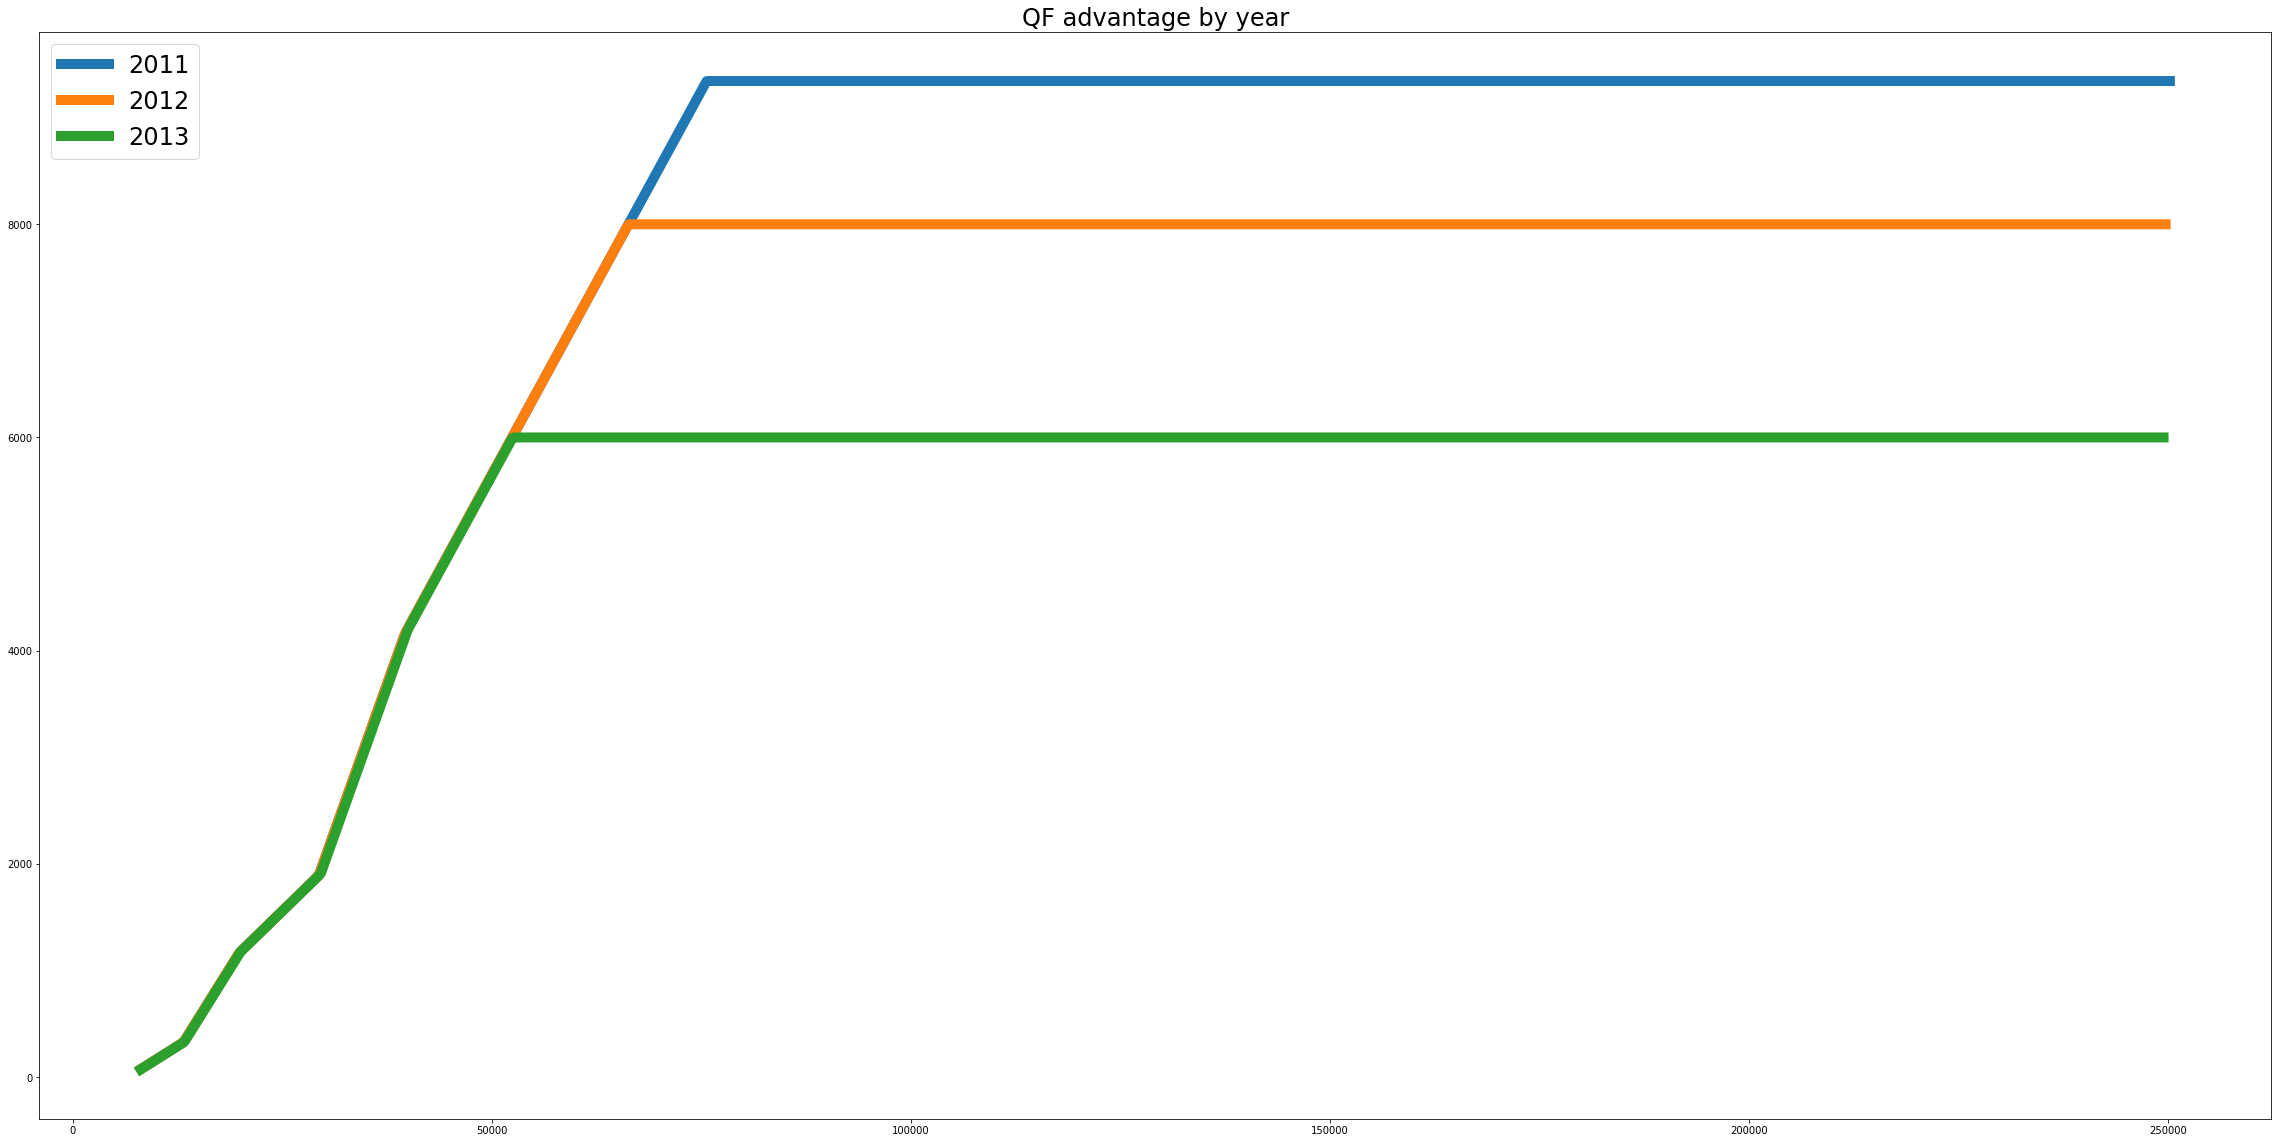

In [13]:
fig = plt.figure(figsize=(40,20))
for year in [2011,2012,2013]:
    plt.plot(simulation_dict[year].calculate_add("salaire_imposable", period = year)[::2+nb_enf],
             simulation_dict[year].calculate("avantage_qf", period = year), label = year, linewidth = 10)

plugins.connect(fig, plugins.MousePosition(fontsize=24, fmt='.5g'))
plt.title('QF advantage by year', fontsize = 24)
plt.legend(fontsize = 24)
